# Bibliothèques

In [1]:
import os
import os.path
os.chdir("C:/Users/maell/Fake_News_Project")

import urllib.request
import zipfile

import pandas as pd
import numpy as np
import community

from scipy import *

import matplotlib.pyplot as plt

import networkx as nx


# 1. _GRAPH SUR UNE JOURNEE_


# Récupération des fichiers qui nous interressent

In [2]:
##################################
# Fonctions utiles
##################################

def filtrer(src, dst):
    date = ['20170930'] #30 septembre 2018
    
    for line in src:
        if 'mentions.CSV' not in line:
            continue
        arr = line.split(' ')
        for time in date:
            if time in arr[2]:
                dst.write(arr[0]+' '+arr[1]+' '+arr[2])


def dezip(filezip, pathdst = ''): 
    if pathdst == '': pathdst = os.getcwd()  ## on dezippe dans le repertoire locale 
    zfile = zipfile.ZipFile(filezip, 'r') 
    for i in zfile.namelist():  ## On parcourt l'ensemble des fichiers de l'archive 
        print (i) 
        if os.path.isdir(i):   ## S'il s'agit d'un repertoire, on se contente de creer le dossier 
            try: os.makedirs(pathdst + os.sep + i) 
            except: pass 
        else: 
            try: os.makedirs(pathdst + os.sep + os.path.dirname(i)) 
            except: pass 
            data = zfile.read(i)                   ## lecture du fichier compresse 
            fp = open(pathdst + os.sep + i, "wb")  ## creation en local du nouveau fichier 
            fp.write(data)                         ## ajout des donnees du fichier compresse dans le fichier local 
            fp.close() 
    zfile.close() 
                
###############################################################################################
# Création du fichier contenant uniquement les liens des fichier mentions qui nous interressent
###############################################################################################

source = open("masterfilelist.txt", "r") # Ouverture du fichier source
destination = open("data_list.csv", "w") # Ouverture du fichier destination
filtrer(source, destination) # Filtrage
destination.close()# Fermeture du fichier destination
source.close()# Fermerture du fichier source
                    
################################
# Récupération des fichiers csv
################################

#enregistrement fichier csv
master_data = pd.read_csv('data_list.csv',sep= ' ',header = None,engine='python')
master_data.columns = ['1','2','url']

#suppression lignes inutiles
for index, row in master_data.iterrows():
    if '.mentions.CSV' not in row['url']:
        master_data = master_data.drop(index)

# vide le dossier où stocker les donnees
for element in os.listdir("C:/Users/maell/Fake_News_Project/data_folder"):
    path="C:/Users/maell/Fake_News_Project/data_folder/"+element
    os.remove(path)
        
#telecharge et dezippe les fichiers depuis le web
for index, row in master_data.iterrows():
    element = row['url']
    urllib.request.urlretrieve(element,'file')
    dezip('file', 'data_folder')
    
print("FIN")

20170930000000.mentions.CSV
20170930001500.mentions.CSV
20170930004500.mentions.CSV
20170930010000.mentions.CSV
20170930011500.mentions.CSV
20170930013000.mentions.CSV
20170930014500.mentions.CSV
20170930020000.mentions.CSV
20170930021500.mentions.CSV
20170930023000.mentions.CSV
20170930024500.mentions.CSV
20170930030000.mentions.CSV
20170930031500.mentions.CSV
20170930033000.mentions.CSV
20170930034500.mentions.CSV
20170930040000.mentions.CSV
20170930041500.mentions.CSV
20170930043000.mentions.CSV
20170930044500.mentions.CSV
20170930050000.mentions.CSV
20170930051500.mentions.CSV
20170930053000.mentions.CSV
20170930054500.mentions.CSV
20170930060000.mentions.CSV
20170930061500.mentions.CSV
20170930063000.mentions.CSV
20170930064500.mentions.CSV
20170930070000.mentions.CSV
20170930071500.mentions.CSV
20170930073000.mentions.CSV
20170930074500.mentions.CSV
20170930080000.mentions.CSV
20170930081500.mentions.CSV
20170930083000.mentions.CSV
20170930084500.mentions.CSV
20170930090000.menti

# Etude des événements de la journée

In [3]:
def open_data(fichier):
    data=pd.read_csv(fichier,sep="\t",header=None)
    column_names=['GlobalEventID','EventTimeDate','MentionTimeDate','MentionType','MentionSourceName','MentionIdentifier','SentenceID','Actor1CharOffset','Actor2CharOffset','ActionCharOffset','InRawText','Confidence','MentionDocLen','MentionDocTone','MentionDocTranslationInfo','Extras']
    data.columns=column_names
    return data

#Cell de test
data=open_data("C:/Users/maell/Fake_News_Project/data_folder/20170930234500.mentions.CSV")
data

,GlobalEventID,EventTimeDate,MentionTimeDate,MentionType,MentionSourceName,MentionIdentifier,SentenceID,Actor1CharOffset,Actor2CharOffset,ActionCharOffset,InRawText,Confidence,MentionDocLen,MentionDocTone,MentionDocTranslationInfo,Extras
0,584150870,20160930000000,20170930234500,1,porkbusiness.com,https://porkbusiness.com/article/packer-margin...,2,-1,574,633,1,50,762,2.325581,NaN,NaN
1,584206355,20160930030000,20170930234500,1,thetimes.co.uk,https://www.thetimes.co.uk/edition/scotland/sc...,2,-1,66,84,1,100,951,0.591716,NaN,NaN
2,694151273,20170930234500,20170930234500,1,inquirer.net,http://globalnation.inquirer.net/160559/war-on...,15,-1,3057,3005,0,10,3247,-4.743833,NaN,NaN
3,694111211,20170930164500,20170930234500,1,nripress.com,http://nripress.com/iran-slaps-fuel-trade-emba...,2,-1,662,627,1,30,860,-3.546099,NaN,NaN
4,584167640,20160930003000,20170930234500,1,sundaymail.co.zw,http://www.sundaymail.co.zw/sekuru-banda-wants...,5,-1,2429,2375,1,80,2573,0.000000,NaN,NaN
5,694151274,20170930234500,20170930234500,1,sundaymail.co.zw,http://www.sundaymail.co.zw/sekuru-banda-wants...,5,-1,2425,2371,0,20,2573,0.000000,NaN,NaN
6,694151275,20170930234500,20170930234500,1,inquirer.net,http://globalnation.inquirer.net/160559/war-on...,15,-1,-1,2986,0,10,3247,-4.743833,NaN,NaN
7,694151276,20170930234500,20170930234500,1,inquirer.net,http://globalnation.inquirer.net/160559/war-on...,15,-1,2888,2876,0,20,3247,-4.743833,NaN,NaN
8,584150083,20160930000000,20170930234500,1,porkbusiness.com,https://porkbusiness.com/article/packer-margin...,2,574,-1,633,1,50,762,2.325581,NaN,NaN
9,694151277,20170930234500,20170930234500,1,thetimes.co.uk,https://www.thetimes.co.uk/edition/news/prince...,2,279,317,327,0,10,907,0.598802,NaN,NaN


In [ ]:
#######################
# Fonction Utile
#######################

def open_data(fichier):
    data=pd.read_csv(fichier,sep="\t",header=None)
    column_names=['GlobalEventID','EventTimeDate','MentionTimeDate','MentionType','MentionSourceName','MentionIdentifier','SentenceID','Actor1CharOffset','Actor2CharOffset','ActionCharOffset','InRawText','Confidence','MentionDocLen','MentionDocTone','MentionDocTranslationInfo','Extras']
    data.columns=column_names
    return data

############################
# Extraction des événements
############################

#Création du DataFrame tab_event
tab_event=pd.DataFrame(columns=['GlobalEventID','NumberMention']) 


for fichier in os.listdir("C:/Users/maell/Fake_News_Project/data_folder"):
    path_fichier="C:/Users/maell/Fake_News_Project/data_folder/"+fichier
    data=open_data(path_fichier)

    #Création du temporaire (tableau avec mention=1)
    unique_event=pd.Series(data.GlobalEventID)
    one=pd.Series(ones(len(data.GlobalEventID)))
    temporaire=pd.DataFrame({'GlobalEventID':data.GlobalEventID,'NumberMention':one})
    
    #On compte pour le quart d'heure
    for event in temporaire.GlobalEventID.unique():
        compteur=0;
        for i in temporaire.index:
            if temporaire.GlobalEventID[i]==event:
                compteur=compteur+temporaire.NumberMention[i]
        row=[]
        row.append({'GlobalEventID':event, 'NumberMention':compteur})
        tab_event=tab_event.append(row, ignore_index=True)
    
    #On rend unique chaque GlobalEventID
    lignes=list(tab_event[tab_event["GlobalEventID"]==event].index)
    if len(lignes)>1:
        for ligne in lignes:
            if ligne!=lignes[0]:
                mention=tab_event.iloc(ligne).NumberMention
                tab_event.iloc(lignes[0]).NumberMention=tab_event.iloc(lignes[0]).NumberMention+mention
                tab_event.remove(tab_event.iloc(ligne))
tab_event
# + VOIR QUAND ON A PLUSIEURS FICHIERS

# Création du Graph
nodes = sources  \  edges = common event

In [3]:
##################
# Fonction utile
##################

def graph_sources(data,G):
    for source in data.MentionSourceName.unique():
        G.add_node(source)
    for event in data.GlobalEventID.unique():
        list_source=data[data.GlobalEventID==event].MentionSourceName
        for source1 in list_source:
            for source2 in list_source:
                if source1!=source2:
                    G.add_edge(source1,source2)
    
################################
# Création du graph
################################

G=nx.Graph()
for fichier in os.listdir("C:/Users/maell/Fake_News_Project/data_folder"):
            #enregistrement fichier csv
            path_fichier="C:/Users/maell/Fake_News_Project/data_folder/"+fichier
            new_data=open_data(path_fichier)
            graph_sources(new_data,G)
            print("OK - "+fichier)
print("FIN")

OK - 20170930000000.mentions.CSV
OK - 20170930001500.mentions.CSV
OK - 20170930004500.mentions.CSV
OK - 20170930010000.mentions.CSV
OK - 20170930011500.mentions.CSV
OK - 20170930013000.mentions.CSV
OK - 20170930014500.mentions.CSV
OK - 20170930020000.mentions.CSV
OK - 20170930021500.mentions.CSV
OK - 20170930023000.mentions.CSV
OK - 20170930024500.mentions.CSV
OK - 20170930030000.mentions.CSV
OK - 20170930031500.mentions.CSV
OK - 20170930033000.mentions.CSV
OK - 20170930034500.mentions.CSV
OK - 20170930040000.mentions.CSV
OK - 20170930041500.mentions.CSV
OK - 20170930043000.mentions.CSV
OK - 20170930044500.mentions.CSV
OK - 20170930050000.mentions.CSV
OK - 20170930051500.mentions.CSV
OK - 20170930053000.mentions.CSV
OK - 20170930054500.mentions.CSV
OK - 20170930060000.mentions.CSV
OK - 20170930061500.mentions.CSV
OK - 20170930063000.mentions.CSV
OK - 20170930064500.mentions.CSV
OK - 20170930070000.mentions.CSV
OK - 20170930071500.mentions.CSV
OK - 20170930073000.mentions.CSV
OK - 20170

# Traitement du Graph

In [8]:
# Sauvegarde Grephi
nx.write_gexf(G,'graph_journee.gexf')

In [5]:
# Suppression des éléments non connectés
composants=list(nx.connected_components(G))
i=0;
while i<len(composants):
    if len(composants[i])==1:
        composant_supp=list(composants[i])[0]
        G.remove_node(composant_supp)
    i=i+1

In [6]:
# Partition
partition = community.best_partition(G)

print ("Partitions found: ", len(set(partition.values())))
for i in set(partition.values()):
    members = [nodes for nodes in partition.keys() if partition[nodes] == i]
    print (i, len(members))
    
nx.set_node_attributes(G,partition,'partition')
#for item in partition.items():
   # G1.nodes[item[0]]['partition']=item[1

Partitions found:  93
0 616
1 651
2 388
3 315
4 180
5 163
6 484
7 144
8 175
9 166
10 2
11 91
12 7
13 6
14 2
15 94
16 2
17 2
18 2
19 7
20 2
21 2
22 2
23 2
24 2
25 2
26 2
27 3
28 2
29 2
30 2
31 2
32 2
33 10
34 2
35 2
36 2
37 2
38 2
39 2
40 2
41 2
42 2
43 3
44 2
45 3
46 2
47 2
48 5
49 3
50 2
51 2
52 2
53 2
54 2
55 2
56 2
57 4
58 2
59 2
60 2
61 2
62 2
63 2
64 2
65 4
66 2
67 3
68 2
69 2
70 2
71 2
72 2
73 2
74 2
75 2
76 3
77 2
78 2
79 2
80 2
81 2
82 2
83 2
84 3
85 2
86 2
87 2
88 2
89 2
90 2
91 2
92 2


In [7]:
# Sauvegarde Grephi
nx.write_gexf(G,'graph_journee_20170930_propre.gexf')

# Analyse du Graph

In [13]:
# Liste des nodes dans communautés 
print("List of nodes in the community :")
for item in set(partition.items()):
    if item[1]==4:
        print(item[0])

List of nodes in the largest community :
thedailytimes.com
voice-online.co.uk
hutchnews.com
wcjb.com
thereporter.com
ukprogressive.co.uk
news-journalonline.com
kiow.com
hollandsentinel.com
premiumbeautynews.com
wvmetronews.com
voiceofalexandria.com
blackhillsfox.com
wearewvproud.com
premiumtimesng.com
metrowestdailynews.com
texomarocks.com
wkbn.com
trueoldies985.com
thenation.com
annistonstar.com
eastpeoriatimescourier.com
wkyc.com
kxii.com
wndu.com
740thefan.com
wrdw.com
dnj.com
respect-mag.com
allkpop.com
dailyworld.com
kristv.com
cbs7.com
jdsupra.com
979cprrocks.com
kens5.com
technobuffalo.com
kfyrtv.com
toofab.com
pressargus.com
classichits925.com
niagarathisweek.com
hannibal.net
morningsun.net
roundhouseradio.com
kktv.com
am930theanswer.com
floydct.com
galvnews.com
al.com
dailymailnews.com
berksmontnews.com
wmac-am.com
hngnews.com
self.com
demingheadlight.com
wabx.net
lmtribune.com
reporter.bz
starnewsonline.com
mlbtraderumors.com
ngnews.ca
z965fm.com
aol.com
vox.com
pekintimes.co

# Graph Autre jour

# Autres

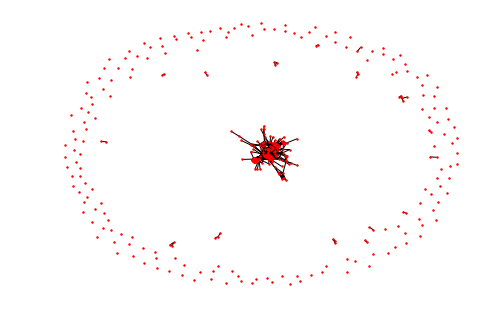

In [10]:
# Tracé
pos = nx.spring_layout(G1)
nx.draw(G1, pos, node_color='r', node_size=2, with_labels=False)

In [11]:
# Sauvegarde Grephi
nx.write_gexf(G1,'graph2.gexf')

In [12]:
# Suppresion des éléments non connectés
nx.number_connected_components(G1)

191

In [13]:
composants=list(nx.connected_components(G1))

In [14]:
composants

[{'104star.com',
  '1170kfaq.com',
  '1280wnam.com',
  '12news.com',
  '13wmaz.com',
  '9and10news.com',
  'alaskahighwaynews.ca',
  'argus-press.com',
  'artnet.com',
  'bbc.co.uk',
  'beaumontenterprise.com',
  'belfasttelegraph.co.uk',
  'bellinghamherald.com',
  'bgdailynews.com',
  'bigtalk1490.com',
  'bnd.com',
  'bordermail.com.au',
  'bradenton.com',
  'btcmanager.com',
  'byronnews.com.au',
  'calgaryherald.com',
  'camdencourier.com.au',
  'campaignasia.com',
  'capradio.org',
  'cbs19.tv',
  'centredaily.com',
  'channelnewsasia.com',
  'charlotteobserver.com',
  'chron.com',
  'couriermail.com.au',
  'ctpost.com',
  'cumberlink.com',
  'dailyadvance.com',
  'dailyexaminer.com.au',
  'dailyjournal.net',
  'dailymail.co.uk',
  'dailyvoice.com',
  'delmarvapublicradio.net',
  'denofgeek.com',
  'dnaindia.com',
  'dw.com',
  'echo-news.co.uk',
  'econintersect.com',
  'econotimes.com',
  'elkodaily.com',
  'elpasoinc.com',
  'express.co.uk',
  'fairfieldcitizenonline.com',
  '

In [15]:
#Suppresion des noeuds qui ne sont reliés à rien
i=0;
while i<len(composants):
    if len(composants[i])==1:
        composant_supp=list(composants[i])[0]
        G1.remove_node(composant_supp)
    i=i+1
    

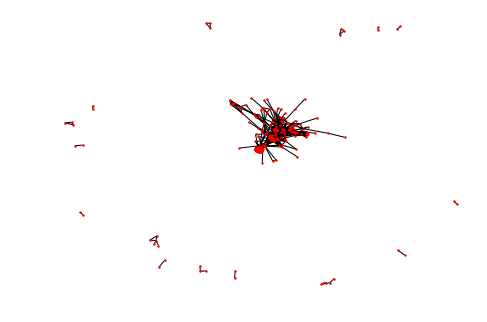

In [16]:
# Tracé sans les noeuds non connectés
pos = nx.spring_layout(G1)
nx.draw(G1, pos, node_color='r', node_size=2, with_labels=False)

In [17]:
# Sauvegarde Gephi sans les noeuds non connectés
nx.write_gexf(G1,'graph3.gexf')

In [76]:
#Detection de communauté
partition = community.best_partition(G1)

In [77]:
partition

{'econotimes.com': 0,
 'today.ng': 1,
 'theguardian.com': 1,
 'denofgeek.com': 0,
 'dailyadvance.com': 1,
 'firstpost.com': 1,
 'kaumudi.com': 0,
 'ktvz.com': 1,
 'kyma.com': 1,
 'sunnewsonline.com': 1,
 'indiatimes.com': 1,
 'cbc.ca': 2,
 'vaalweekblad.com': 1,
 'echo-news.co.uk': 0,
 'theepochtimes.com': 1,
 'english.wafa.ps': 3,
 'vancourier.com': 0,
 'gdnonline.com': 1,
 'hickoryrecord.com': 0,
 'startribune.com': 1,
 'nagariknetwork.com': 1,
 'newser.com': 4,
 'express.co.uk': 0,
 'bordermail.com.au': 0,
 'couriermail.com.au': 4,
 'kmjnow.com': 1,
 'bigtalk1490.com': 1,
 'wftw.com': 1,
 'wmal.com': 1,
 'wxyz.com': 1,
 'mychamplainvalley.com': 1,
 'tribtown.com': 0,
 'metro.us': 1,
 'nigerianpilot.com': 5,
 'allafrica.com': 6,
 'youroilandgasnews.com': 7,
 'fin24.com': 7,
 'standard.net.au': 0,
 'juneesoutherncross.com.au': 0,
 'singletonargus.com.au': 0,
 'thejournal.ie': 1,
 'byronnews.com.au': 4,
 'dailyexaminer.com.au': 4,
 'whitsundaytimes.com.au': 4,
 'sunshinecoastdaily.com.

In [90]:
# to show members of each partition:
print ("Partitions found: ", len(set(partition.values())))
for i in set(partition.values()):
    members = [nodes for nodes in partition.keys() if partition[nodes] == i]
    print (i, len(members))

Partitions found:  20
0 48
1 74
2 2
3 3
4 8
5 5
6 2
7 2
8 3
9 73
10 2
11 3
12 3
13 2
14 2
15 2
16 2
17 2
18 2
19 3


In [123]:
print("List of nodes in the largest community :")
for item in set(partition.items()):
    if item[1]==1:
        print(item[0])

List of nodes in the largest community :
stl.news
theworldlink.com
proactiveinvestors.co.uk
opb.org
katu.com
capradio.org
southgatearc.org
104star.com
newidea.com.au
indiatimes.com
straitstimes.com
btcmanager.com
malaysiakini.com
artnet.com
wlrn.org
cbs19.tv
sunnewsonline.com
nbc4i.com
helenair.com
star1021fm.com
news.lk
wpri.com
thv11.com
spacewar.com
newshounds.us
theepochtimes.com
mychamplainvalley.com
wjsu.org
godanriver.com
herald-review.com
kmjnow.com
spokanepublicradio.org
delmarvapublicradio.net
elkodaily.com
gdnonline.com
ksbw.com
kyma.com
wxyz.com
nydailynews.com
nbcnews.com
wfsu.org
metro.us
udayavani.com
bigtalk1490.com
wmal.com
ktvz.com
kentuckynewera.com
12news.com
nzherald.co.nz
dailyadvance.com
wftw.com
wtkr.com
wakg.com
startribune.com
vaalweekblad.com
firstpost.com
thejournal.ie
rockymounttelegram.com
nagariknetwork.com
theglobeandmail.com
13wmaz.com
headlineplanet.com
1170kfaq.com
trust.org
1280wnam.com
kagstv.com
tucson.com
dnaindia.com
today.ng
pulse.ng
theguardian

In [124]:
print("List of nodes in the 2nd largest community :")
for item in set(partition.items()):
    if item[1]==9:
        print(item[0])

List of nodes in the 2nd largest community :
wral.com
myjournalcourier.com
therepublic.com
macon.com
readingeagle.com
kpvi.com
newsobserver.com
wtvq.com
thenewstribune.com
tri-cityherald.com
oleantimesherald.com
vancouversun.com
sanluisobispo.com
fresnobee.com
timesunion.com
koin.com
ledger-enquirer.com
thetelegraph.com
newstimes.com
mercedsunstar.com
swiowanewssource.com
newsbug.info
myrtlebeachonline.com
theprogressnews.com
argus-press.com
houstonchronicle.com
nhregister.com
montrealgazette.com
sunherald.com
middletownpress.com
myplainview.com
centredaily.com
greenwichtime.com
bradenton.com
registercitizen.com
bnd.com
wbtw.com
fairfieldcitizenonline.com
kentucky.com
idahostatesman.com
wtop.com
theolympian.com
cumberlink.com
elpasoinc.com
chron.com
star-telegram.com
9and10news.com
kvoa.com
thehour.com
lfpress.com
beaumontenterprise.com
westport-news.com
dailymail.co.uk
ctpost.com
sfchronicle.com
kansascity.com
lancasteronline.com
taiwannews.com.tw
kristv.com
mrt.com
tampabay.com
natio

In [112]:
#Ajout de la communauté comme attribut de chaque noeud

#nx.set_node_attributes(G1,'partition',partition)

for item in partition.items():
    G1.nodes[item[0]]['partition']=item[1]

In [113]:
nx.get_node_attributes(G1,'partition')

{'econotimes.com': 0,
 'today.ng': 1,
 'theguardian.com': 1,
 'denofgeek.com': 0,
 'dailyadvance.com': 1,
 'firstpost.com': 1,
 'kaumudi.com': 0,
 'ktvz.com': 1,
 'kyma.com': 1,
 'sunnewsonline.com': 1,
 'indiatimes.com': 1,
 'cbc.ca': 2,
 'vaalweekblad.com': 1,
 'echo-news.co.uk': 0,
 'theepochtimes.com': 1,
 'english.wafa.ps': 3,
 'vancourier.com': 0,
 'gdnonline.com': 1,
 'hickoryrecord.com': 0,
 'startribune.com': 1,
 'nagariknetwork.com': 1,
 'newser.com': 4,
 'express.co.uk': 0,
 'bordermail.com.au': 0,
 'couriermail.com.au': 4,
 'kmjnow.com': 1,
 'bigtalk1490.com': 1,
 'wftw.com': 1,
 'wmal.com': 1,
 'wxyz.com': 1,
 'mychamplainvalley.com': 1,
 'tribtown.com': 0,
 'metro.us': 1,
 'nigerianpilot.com': 5,
 'allafrica.com': 6,
 'youroilandgasnews.com': 7,
 'fin24.com': 7,
 'standard.net.au': 0,
 'juneesoutherncross.com.au': 0,
 'singletonargus.com.au': 0,
 'thejournal.ie': 1,
 'byronnews.com.au': 4,
 'dailyexaminer.com.au': 4,
 'whitsundaytimes.com.au': 4,
 'sunshinecoastdaily.com.

In [1]:
new_data

NameError: name 'new_data' is not defined

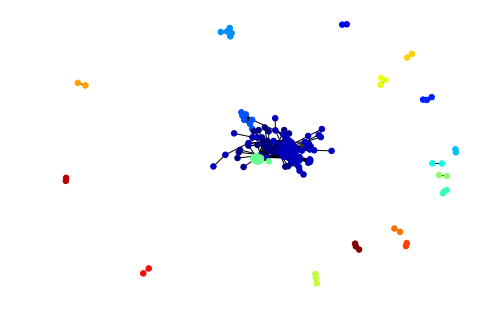

In [47]:
#Drawing
values = [partition.get(node) for node in G1.nodes()]

nx.draw_spring(G1, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)